In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iran-covid-1mos/train.csv
/kaggle/input/iran-covid-1mos/test.csv


Read train and test data

In [139]:
# Load COVID-19 dataset
data = pd.read_csv("/kaggle/input/iran-covid-1mos/train.csv", header=None, names=["index", "day", "cases"], dtype="Int64", skip_blank_lines=True, usecols=["day", "cases"])
test = pd.read_csv("/kaggle/input/iran-covid-1mos/test.csv", header=None, names=["index", "day", "cases"], dtype="Int64", skip_blank_lines=True, usecols=["day", "cases"])

# Remove N/A
data = data.dropna().reset_index(drop=True)
test = test.dropna().reset_index(drop=True)

In [141]:
data.describe()

,day,cases
count,31.000000,31.000000
mean,15.645161,6678.548387
std,8.693095,2075.576110
min,1.000000,3822.000000
25%,8.500000,4723.000000
50%,16.000000,6191.000000
75%,22.500000,8372.500000
max,30.000000,10463.000000


In [ ]:
# Training data
X = np.arange(len(data)) + 1 # 1, 2, ..., 31
X = X.reshape(-1, 1)
t = data[["cases"]]

# Test data
Xtest = np.arange(len(test)) + len(data) + 1 # 32, 33, ..., 41
Xtest = Xtest.reshape(-1, 1)
ttest = test[["cases"]]

In [ ]:
def mean(numbers):
    """ Calculate mean of given numbers """
    return sum(numbers) / len(numbers)
 
def cov(X, t):
    """ Calculate cov between X and t """
    mean_X = mean(X)
    mean_t = mean(t)
    
    return sum([(X[n] - mean_X) * (t[n] - mean_t) for n in range(len(X))])

def var(numbers):
    """ Calculate variance of numbers """
    mu = mean(numbers)
    return sum([(n - mu) ** 2 for n in numbers])
 
# Calculate coefficients
def coefficients(dataset):
    X = dataset[:,0]
    t = dataset[:,1]
    mean_x, mean_y = mean(X), mean(t)
    coef = cov(X, t) / var(X)
    intercept = mean_y - coef * mean_x
    return [intercept, coef]
 
# calculate coefficients
dataset = np.dstack((X, t)).reshape(-1, 2)
intercept, coef = coefficients(dataset)
print("intercept:", intercept)
print("coef:", coef)

Coefficients: 
 [[222.04112903]]
Intercept: 
 [3125.89032258]
Mean squared error: 1814456.25
Coefficient of determination: -1.69


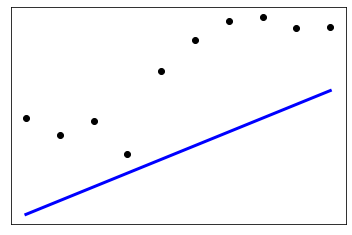

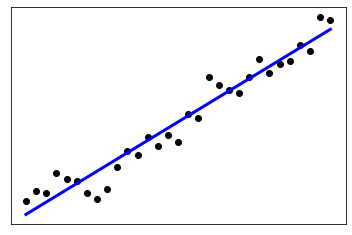

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, t)

# Make predictions using the testing set
t_pred = regr.predict(Xtest)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(ttest, t_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(ttest, t_pred))

# Plot outputs (test)
plt.scatter(Xtest, ttest,  color='black')
plt.plot(Xtest, t_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Plot Train
plt.scatter(X, t,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [159]:
regr.predict([[len(data) + len(test) + 1 + 29]])

array([[18890.81048387]])